# ST2195 Coursework Part 1

## UOL ID: 204460044

In [1]:
# Import libraries into python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

## Part 1 (a)

In [2]:
# Given probability density function
def f(x):
    return 0.5 * np.exp(-np.abs(x))  # defining f(x)

In [3]:
# Step 1:
x0 = 0  # initial x value
N = 10000  # sample size
s = 1  # standard deviation

In [4]:
# Step 2: Function to perform Metropolis-Hastings Algorithm.
def mh(N, x0, s):
    x = np.zeros(N)  # setting up numeric vector to store generated x
    x_current = x0

    for i in range(N):
        x_star = np.random.normal(loc=x_current, scale=s)  # simulate random x* from Normal distribution

        # computing log acceptance ratio
        lg_r = np.log(f(x_star)) - np.log(f(x_current))  # log is taken to make sure linearity

        # generate random number u
        lg_u = np.log(np.random.uniform())

        # accept or reject x0 based on log acceptance ratio
        if lg_u < lg_r:
            x_current = x_star  # accepted

        # saving the sample
        x[i] = x_current

    return x

In [5]:
# Running Metropolis-Hastings Algorithm.
x = mh(N, x0, s)

In [6]:
# Create a density estimate for the samples
kde = gaussian_kde(x)

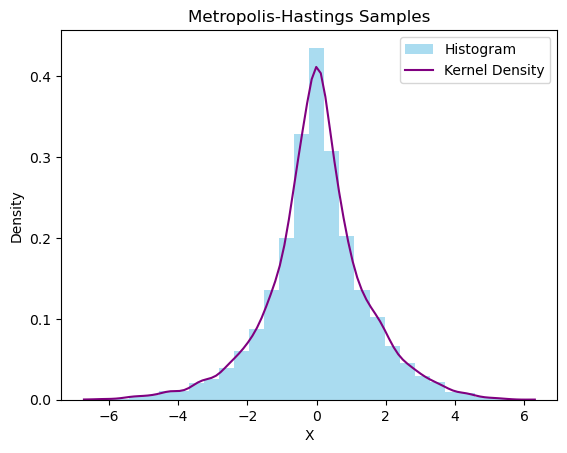

In [7]:
# To plot a histogram
plt.hist(x, bins=30, density=True, color='skyblue', alpha=0.7, label='Histogram')

# To plot a kernel density plot
density = np.linspace(min(x), max(x), 100)
plt.plot(density, kde(density), color='purple', label='Kernel Density')
plt.title("Metropolis-Hastings Samples")
plt.xlabel("X")
plt.ylabel("Density")
plt.legend()
plt.show()

In [8]:
# Reporting Sample mean and Standard deviation of generated samples.
montecarlo_mean = np.mean(x)
montecarlo_sd = np.std(x)

In [9]:
# Printing results
print("Monte Carlo Estimate of Mean:", montecarlo_mean)
print("Monte Carlo Estimate of Standard Deviation:", montecarlo_sd)

Monte Carlo Estimate of Mean: 0.009532301512374816
Monte Carlo Estimate of Standard Deviation: 1.4423424599472325


## (b)

In [10]:
# Part b parameters.
N_b = 2000
s_b = 0.001
J_b = 4

In [11]:
# Obtaining chain sequence.
def mh_chains(N_b, s_b, J_b):
    chains = np.zeros((N_b, J_b))  # matrix to store chain, all values of (n,j) is 0

    for j in range(J_b):
        x_current_b = 0  # Setting all initial value of each chain as 0

        for i_b in range(N_b):
            x_star_b = np.random.normal(loc=x_current_b, scale=s_b)  # simulate X*~N (x_current, s^2)

            # computing log acceptance ratio
            lg_r_b = np.log(f(x_star_b)) - np.log(f(x_current_b))  # log is taken to make sure linearity

            # generate random number u
            lg_u_b = np.log(np.random.uniform())  # random u from uniform distribution from [0,1)

            # accept or reject x0 based on log acceptance ratio
            if lg_u_b < lg_r_b:
                x_current_b = x_star_b

            chains[i_b, j] = x_current_b

    return chains

### Computation:

In [12]:
# generating chain with parameters
chains_b = mh_chains(N_b, s_b, J_b)

In [13]:
# checking for NaN in chain
if np.any(np.isnan(chains_b)):
    print("There in NaN in chain_b")

In [14]:
# Sample mean of chain j, Mj
def sample_mean_chain(chains_b, J_b):
    M_j = np.zeros(J_b)

    for j in range(J_b):
        chain_j = chains_b[:, j]
        M_j[j] = np.mean(chain_j)

    return M_j

In [15]:
## calculating sample mean for each chain
M_j = sample_mean_chain(chains_b, J_b)

In [16]:
### print
for j in range(J_b):
    print("The sample mean, Mj, of chain j =", j + 1, ":", M_j[j])

The sample mean, Mj, of chain j = 1 : -0.001913237211460233
The sample mean, Mj, of chain j = 2 : -0.03756829776955117
The sample mean, Mj, of chain j = 3 : 0.00602672431802887
The sample mean, Mj, of chain j = 4 : -0.004848754223445043


In [17]:
# Sample variance of chain j, Vj
def sample_variance_chain(chains_b, J_b):
    V_j = np.zeros(J_b)

    for j in range(J_b):
        chain_j = chains_b[:, j]
        V_j[j] = np.sum((chain_j - np.mean(chain_j))**2) / N_b

    return V_j

In [18]:
## calculating sample variance for each chain
V_j = sample_variance_chain(chains_b, J_b)

In [19]:
### print
for j in range(J_b):
    print("The sample variance, Vj, of chain j =", j + 1, ":", V_j[j])

The sample variance, Vj, of chain j = 1 : 0.000289202117562394
The sample variance, Vj, of chain j = 2 : 0.00028680022931802576
The sample variance, Vj, of chain j = 3 : 0.00016824535719027231
The sample variance, Vj, of chain j = 4 : 0.0001299218541421996


In [20]:
# Overall within sample variance, W
def overall_within_variance(chains_b, J_b):
    W = np.sum(V_j) / J_b

    return W

In [21]:
## calculating overall within sample variance W
W = overall_within_variance(chains_b, J_b)

In [22]:
### print
print("The overall within sample variance, W:", W)

The overall within sample variance, W: 0.0002185423895532229


In [23]:
# Overall sample mean, M
def overall_sample_mean(chains_b, J_b):
    M = np.sum(M_j) / J_b

    return M

In [24]:
## calculating overall sample mean M
M = overall_sample_mean(chains_b, J_b)

In [25]:
### print
print("The overall sample mean, M:", M)

The overall sample mean, M: -0.009575891221606896


In [26]:
# In between sample variance B
def inbtw_var_B(chains_b, J_b):
    B = np.sum((M_j - M)**2) / J_b

    return B

In [27]:
## calculating between sample variance variance B
B = inbtw_var_B(chains_b, J_b)

In [28]:
### print
print("The between sample variance, B:", B)

The between sample variance, B: 0.00027701963167542116


In [29]:
# R hat value
def calc_r_hat(chains_b, J_b):
    B = inbtw_var_B(chains_b, J_b)
    W = overall_within_variance(chains_b, J_b)
    r_hat = np.sqrt((B + W) / W)

    return r_hat

In [30]:
## calculating r hat
r_hat = calc_r_hat(chains_b, J_b)

In [31]:
### print
print("The r hat value is", r_hat)

The r hat value is 1.5058480958664033


In [32]:
# Keeping N and J fixed, plot r hat over s [0.001, 1]
def metropolis_hastings(x0, N_b, s, j):
    samples = np.zeros(N_b)  # Creating an empty vector with length N_b
    current_value = x0

    for i in range(N_b):
        x_star = np.random.normal(loc=current_value, scale=s)
        log_ratio = -np.abs(x_star)**j + np.abs(x0)**j  # Old ratio with logarithm
        log_u = np.log(np.random.uniform())

        if log_u < log_ratio:
            current_value = x_star

        samples[i] = current_value

    return samples

In [33]:
# Function to calculate R_hat for a given s
def calc_R_hat(N, s, J, j):
    chains = np.array([metropolis_hastings(0, N, s, j) for _ in range(J)])
    M_j = np.mean(chains, axis=1)
    V_j = np.var(chains, axis=1)
    W = np.mean(V_j)
    M = np.mean(M_j)
    B = np.mean((M_j - M) ** 2)
    
     # Ensure B is not zero to avoid division by zero
    if B == 0:
        B = 1e-6  # Small nonzero value

    R_hat = np.sqrt((B + W) / W)

    return R_hat

In [34]:
# Parameters
N_s = 2000
J_s = 4
s_values = np.linspace(0.001, 1, num=100)
j_s = 2  # used for raising power to 2

In [35]:
# Set the seed value
seed_value = 123
np.random.seed(seed_value)

In [36]:
# Calculate R_hat for each s
R_hat_values = [calc_R_hat(N_s, s, J_s, j_s) for s in s_values]

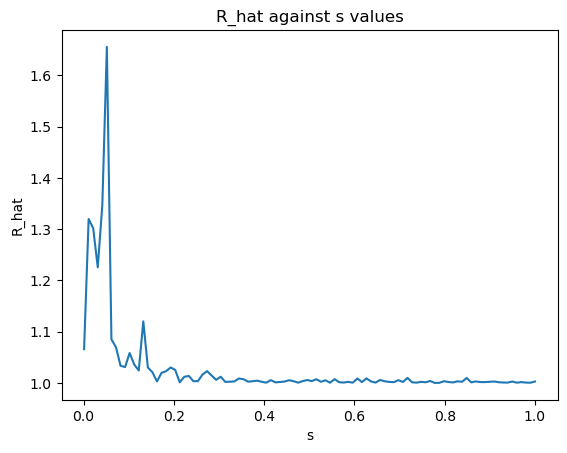

In [37]:
# Plot the results
plt.plot(s_values, R_hat_values)
plt.xlabel('s')
plt.ylabel('R_hat')
plt.title('R_hat against s values')
plt.show()